# Trabalho INF1032 - Ciência de Dados

## Grupo: Guilherme Vassallo e Rodrigo V. Cortezi

### Base de dados: TMDB 5000 Movie Dataset, no Kaggle.
#### https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata

### Nosso objetivo é utilizar essa base de dados e a Ciência de Dados para descobrir informações interessantes e valiosas sobre o universo dos filmes.

## Ideias gerais:

-Descobrir quanto cada filme faturou ✔

-Descobrir filmes que mais faturaram ✔

-Descobrir filmes que menos faturaram ✔

-Quantos filmes tiveram prejuízo (e a porcentagem) ✔

-Descobrir se existe relação entre a recepção do público e o faturamento, retorno ou orçamento

-Entender como o orçamento afeta a receita ✔? (pode melhorar)

-Descobrir quais produtoras tiveram mais sucesso (maior número de obras lançadas e 
maior retorno financeiro).

### Ideia de levantamento de dados temática: Vampiros vs lobisomens (Pode ser feito para qqr gênero)

-Extrair filmes de vampiro ✔

-Extrair filmes de lobisomem ✔
    
-Descobrir quanto filmes de vampiro arrecadaram no total

-Descobrir quanto filmes de lobisomem arrecadam no total

-Comparar quanto filmes de lobisomem e de vampiro arrecadam em média

-Quantos filmes de lobisomem e de vampiros existem na tabela ✔

-Chance de um filme de lobisomem ou de vampiro ter prejuízo

-Descobrir como (e se) a rentabilidade e a recepção de filmes de lobisomem e vampiro alterou com o tempo
(no passado filmes de lobisomem faturavam mais ou eram mais bem recebidos?)

-Comparar recepção e ganhos dos filmes "solo" de vampiro e lobisomem com os da série Crepúsculo (Twilight)

### Melhorar:

-Detecção de outliers / valores nulos

-Estrutura e legibilidade dos gráficos

-Excluir campos desnecessários da tabela?

## Exibindo base de dados

In [298]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast
from IPython.display import display, HTML

movies = pd.read_csv("tmdb_5000_movies.csv")
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## Calculando lucro dos filmes (retorno - orçamento)

**Dados utilizados**

**Budget**: orçamento do filme em dólares americanos.

**Revenue**: receita do filme em dólares americanos.

In [299]:
movies["profit"] = movies["revenue"] - movies["budget"]

view = movies[["id", "original_title", "budget", "revenue", "profit"]]
view.head(30)

,id,original_title,budget,revenue,profit
0,19995,Avatar,237000000,2787965087,2550965087
1,285,Pirates of the Caribbean: At World's End,300000000,961000000,661000000
2,206647,Spectre,245000000,880674609,635674609
3,49026,The Dark Knight Rises,250000000,1084939099,834939099
4,49529,John Carter,260000000,284139100,24139100
5,559,Spider-Man 3,258000000,890871626,632871626
6,38757,Tangled,260000000,591794936,331794936
7,99861,Avengers: Age of Ultron,280000000,1405403694,1125403694
8,767,Harry Potter and the Half-Blood Prince,250000000,933959197,683959197
9,209112,Batman v Superman: Dawn of Justice,250000000,873260194,623260194


## Quais filmes lucraram mais?

In [300]:
movies_sorted_profit = movies.sort_values(
    by = "profit",
    ascending = False)
top10 = movies_sorted_profit.head(10)
top10[["id", "original_title", "profit"]]

,id,original_title,profit
0,19995,Avatar,2550965087
25,597,Titanic,1645034188
28,135397,Jurassic World,1363528810
44,168259,Furious 7,1316249360
16,24428,The Avengers,1299557910
7,99861,Avengers: Age of Ultron,1125403694
124,109445,Frozen,1124219009
546,211672,Minions,1082730962
329,122,The Lord of the Rings: The Return of the King,1024888979
31,68721,Iron Man 3,1015439994


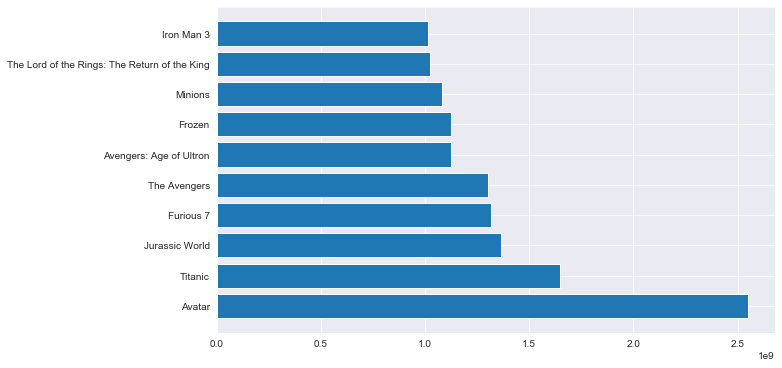

In [301]:
plt.figure(figsize=(10,6))
plt.barh('title', 'profit',data = movies_sorted_profit.head(10))
plt.savefig("movies_most_earned.png")

## Quais filmes tiveram mais prejuízo?

In [302]:
movies_with_loss = movies[movies.profit < 0]
movies_with_loss_sorted = movies_with_loss.sort_values(
    by = "profit",
    ascending = True)
top10 = movies_with_loss_sorted.head(10)
top10[["id", "original_title", "profit"]]

,id,original_title,profit
13,57201,The Lone Ranger,-165710090
135,7978,The Wolfman,-150000000
338,10733,The Alamo,-119180039
141,50321,Mars Needs Moms,-111007242
1652,14164,Dragonball Evolution,-100000000
208,1911,The 13th Warrior,-98301101
311,11692,The Adventures of Pluto Nash,-92896027
2638,19,Metropolis,-91969578
467,9822,Mighty Joe Young,-90000000
376,10357,Volcano,-90000000


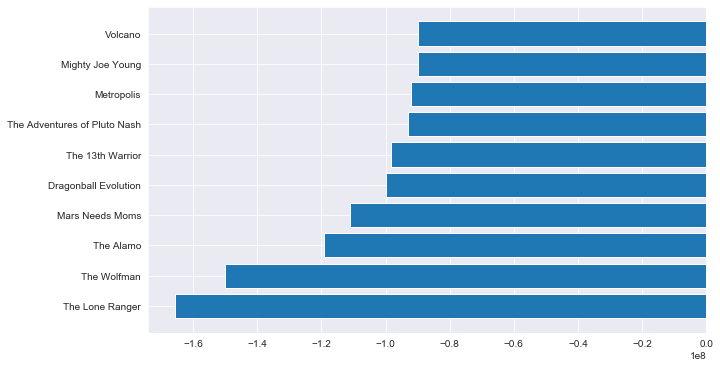

In [303]:
plt.figure(figsize=(10,6))
plt.barh('title', 'profit',data = movies_with_loss_sorted.head(10))
plt.savefig("movies_less_earned.png")

## Quantos filmes tiveram prejuízo?

In [304]:
movies_with_loss["profit"].count() / movies["profit"].count()

0.27607745159275454

### Aproximadamente 28% dos filmes tiveram prejuízo.



# ---- A partir daqui, tudo foi feito pós G1 ---------

## Detectando valores nulos

In [305]:
movies[movies.isnull().any(axis = 1)]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit
10,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.superman.com,1452,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,2006-06-28,391081192,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Superman Returns,5.4,1400,121081192
15,225000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 10751...",NaN,2454,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,The Chronicles of Narnia: Prince Caspian,One year after their incredible adventures in ...,53.978602,"[{""name"": ""Walt Disney"", ""id"": 5888}, {""name"":...",...,2008-05-15,419651413,150.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Hope has a new face.,The Chronicles of Narnia: Prince Caspian,6.3,1630,194651413
24,207000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",NaN,254,"[{""id"": 774, ""name"": ""film business""}, {""id"": ...",en,King Kong,"In 1933 New York, an overly ambitious movie pr...",61.226010,"[{""name"": ""WingNut Films"", ""id"": 11}, {""name"":...",...,2005-12-14,550000000,187.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The eighth wonder of the world.,King Kong,6.6,2337,343000000
27,209000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",NaN,44833,"[{""id"": 1721, ""name"": ""fight""}, {""id"": 4410, ""...",en,Battleship,"When mankind beams a radio signal into space, ...",64.928382,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,2012-04-11,303025485,131.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The Battle for Earth Begins at Sea,Battleship,5.5,2114,94025485
33,210000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",NaN,36668,"[{""id"": 1852, ""name"": ""mutant""}, {""id"": 8828, ...",en,X-Men: The Last Stand,"When a cure is found to treat mutations, lines...",3.857526,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2006-05-24,459359555,104.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Take a Stand,X-Men: The Last Stand,6.3,3525,249359555
34,200000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",NaN,62211,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 5984,...",en,Monsters University,A look at the relationship between Mike and Su...,89.186492,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2013-06-20,743559607,104.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,School never looked this scary.,Monsters University,7.0,3528,543559607
47,190000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,54138,"[{""id"": 1612, ""name"": ""spacecraft""}, {""id"": 60...",en,Star Trek Into Darkness,When the crew of the Enterprise is called back...,78.291018,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,2013-05-05,467365246,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Earth Will Fall,Star Trek Into Darkness,7.4,4418,277365246
49,105000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,64682,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,The Great Gatsby,An adaptation of F. Scott Fitzgerald's Long Is...,61.196071,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",...,2013-05-10,351040419,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Reserving judgments is a matter of infinite ho...,The Great Gatsby,7.3,3769,246040419
56,185000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.startrekmovie.com/,188927,"[{""id"": 9663, ""name"": ""sequel""}, {""id"": 9743, ...",en,Star Trek Beyond,The USS Enterprise cr

### Em alguns casos faz sentido haver valores nulos, como por exemplo na coluna "tagline" no caso do filme não possuir um bordão, ou na coluna "homepage" quando um filme não possui uma homepage.

### Podemos reparar também que alguns valores estão zerados quando não deveriam estar, como por exemplo o lucro, o orçamento e a falta de idiomas ou palavras chave, em alguns filmes. Essas linhas provavelmente podem ser retiradas.

## Detecção de outliers

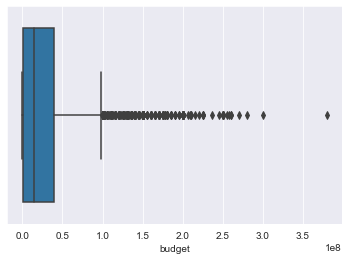

In [306]:
sns.boxplot(movies['budget'])

In [307]:
highest_budgets = movies.sort_values(
    by = "budget",
    ascending = False)
top10 = highest_budgets.head(10)
top10[["original_title", "budget"]]

,original_title,budget
17,Pirates of the Caribbean: On Stranger Tides,380000000
1,Pirates of the Caribbean: At World's End,300000000
7,Avengers: Age of Ultron,280000000
10,Superman Returns,270000000
4,John Carter,260000000
6,Tangled,260000000
5,Spider-Man 3,258000000
13,The Lone Ranger,255000000
46,X-Men: Days of Future Past,250000000
22,The Hobbit: The Desolation of Smaug,250000000


### Filmes com orçamentos acima de 100 milhões são tão raros na tabela que são tratados como outliers, mas todos os valores de fato condizem com os orçamentos.

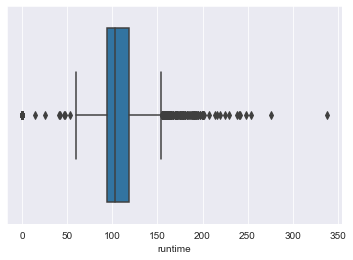

In [308]:
sns.boxplot(movies['runtime'])

### Podemos ver que, sem muita surpresa, a maioria dos filmes tem duração entre 1h 30 min e 2h.

In [309]:
highest_runtimes = movies.sort_values(
    by = "runtime",
    ascending = False)
top10 = highest_runtimes.head(10)
top10[["original_title", "release_date", "runtime"]]

,original_title,release_date,runtime
2384,Carlos,2010-05-19,338.0
2631,The Company,2007-08-05,276.0
1922,Gettysburg,1993-10-08,254.0
1125,Cleopatra,1963-06-12,248.0
2373,Hamlet,1996-12-25,242.0
3510,Emma,2009-10-11,240.0
3813,Gone with the Wind,1939-12-15,238.0
1663,Once Upon a Time in America,1984-02-16,229.0
4497,Woodstock,1970-03-26,225.0
1109,Heaven's Gate,1980-11-19,219.0


### E aqui, podemos ver os filmes com maior duração.

## Limpando a tabela

### Convertendo strings com listas (ex: campo keywords) para listas de verdade

In [310]:
import ast

def organize_column(x):
    fields = []
    for i in ast.literal_eval(x):
        fields.append(i['name'])
    return fields

movies['keywords'] = movies['keywords'].apply(lambda x: organize_column(x))
movies['genres'] = movies['genres'].apply(lambda x: organize_column(x))
movies['production_companies'] = movies['production_companies'].apply(lambda x: organize_column(x))
movies['production_countries'] = movies['production_countries'].apply(lambda x: organize_column(x))

### Excluindo colunas desnecessárias

In [311]:
clean_movies = movies.drop(['id','spoken_languages', 'homepage','original_title'], axis=1)

cols = clean_movies.columns.to_list()
cols.remove('title')
cols.insert(0, 'title')
clean_movies = clean_movies[cols]

clean_movies = clean_movies.rename(columns={"original_language": "language"})

In [312]:
clean_movies.head()

,title,budget,genres,keywords,language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,vote_average,vote_count,profit
0,Avatar,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,7.2,11800,2550965087
1,Pirates of the Caribbean: At World's End,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",6.9,4500,661000000
2,Spectre,245000000,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,Released,A Plan No One Escapes,6.3,4466,635674609
3,The Dark Knight Rises,250000000,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",en,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,Released,The Legend Ends,7.6,9106,834939099
4,John Carter,260000000,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",en,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",6.1,2124,24139100


### Salvando tabela limpa

In [313]:
clean_movies.to_csv('clean_movies.csv', index=False)

In [314]:
movies = pd.read_csv('clean_movies.csv')

### Convertendo release date para formato real de data
#### Não dá pra fazer isso antes de salvar pq o csv não salva data

In [315]:

movies['release_date'] = pd.to_datetime(movies['release_date']).dt.date

## Descobrindo década de cada filme

In [316]:
import datetime

In [317]:
#Função que recebe uma data e retorna sua década
#Retorna 0 se não encontrar a data

def get_decade(x):
    if type(x)==datetime.date:
        the_decade = str(x.year)[:-1]+'0'
        return the_decade
    else:
        return "invalid"
    
data_ex = datetime.date(1985, 1, 2)
get_decade(data_ex)

'1980'

### Criando coluna "década"

In [318]:
movies['decade'] = movies['release_date'].apply(lambda x: get_decade(x))

In [319]:
movies[['title', 'release_date', 'decade']].head()

,title,release_date,decade
0,Avatar,2009-12-10,2000
1,Pirates of the Caribbean: At World's End,2007-05-19,2000
2,Spectre,2015-10-26,2010
3,The Dark Knight Rises,2012-07-16,2010
4,John Carter,2012-03-07,2010


## Plotando filmes e seus lucros e orçamentos, por década:

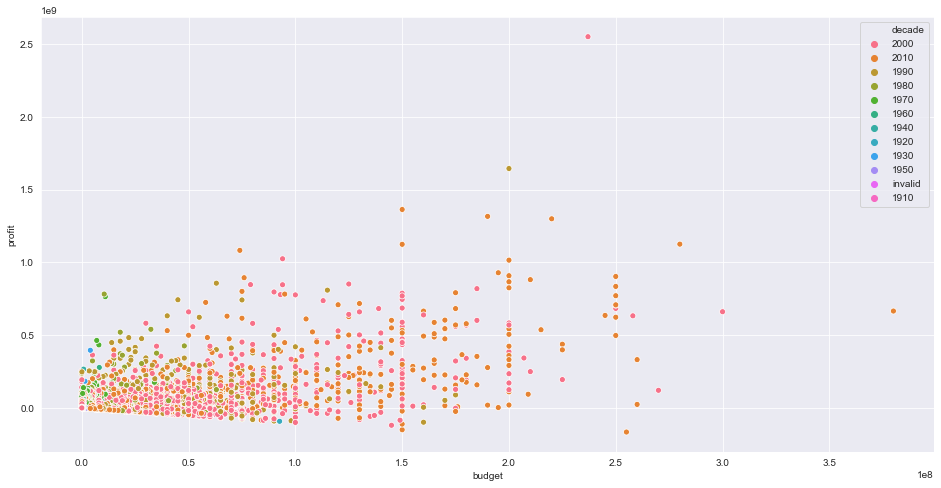

In [320]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=movies, x='budget', y='profit', hue='decade')

# 🧛‍ Vampiros vs Lobisomens 🐺

## Extraindo filmes de lobisomem:

In [321]:
# datatype casting (se precisar converter listas salvas como string para listas reais). 
# working_df['genres'] = working_df['genres'].apply( lambda x: ast.literal_eval(x))

#nesse caso, facilita se as listas de keywords estiverem como string

In [322]:
werewolf_movies = movies[movies['keywords'].str.contains('werewolf')]
werewolf_movies

,title,budget,genres,keywords,language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,vote_average,vote_count,profit,decade
8,Harry Potter and the Half-Blood Prince,250000000,"['Adventure', 'Fantasy', 'Family']","['witch', 'magic', 'broom', 'school of witchcr...",en,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"['Warner Bros.', 'Heyday Films']","['United Kingdom', 'United States of America']",2009-07-07,933959197,153.0,Released,Dark Secrets Revealed,7.4,5293,683959197,2000
135,The Wolfman,150000000,"['Drama', 'Horror', 'Thriller']","['father son relationship', 'victorian england...",en,"Lawrence Talbot, an American man on a visit to...",21.214571,"['Universal Pictures', 'Stuber Productions', '...",['United States of America'],2010-02-11,0,102.0,Released,When the moon is full the legend comes to life,5.5,549,-150000000,2010
191,Harry Potter and the Prisoner of Azkaban,130000000,"['Adventure', 'Fantasy', 'Family']","['flying', 'traitor', 'magic', 'cutting the co...",en,"Harry, Ron and Hermione return to Hogwarts for...",79.679601,"['1492 Pictures', 'Heyday films', 'Warner Bros.']","['United Kingdom', 'United States of America']",2004-05-31,789804554,141.0,Released,Something wicked this way comes.,7.7,5877,659804554,2000
584,Wolf,0,['Fantasy'],"['adultery', 'heal', 'bite', 'werewolf']",en,Publisher Will Randall becomes a werewolf and ...,13.758526,['Columbia Pictures'],['United States of America'],1994-06-17,0,125.0,Released,The animal is out.,6.0,216,0,1990
597,Underworld: Awakening,70000000,"['Fantasy', 'Action', 'Horror']","['vampire', 'daughter', 'hybrid', 'child vampi...",en,After being held in a coma-like state for fift...,58.401204,"['Lakeshore Entertainment', 'Saturn Films', 'S...",['United States of America'],2012-01-19,160112671,88.0,Released,Vengeance Returns,6.1,1862,90112671,2010
612,The Twilight Saga: Eclipse,68000000,"['Adventure', 'Fantasy', 'Drama', 'Romance']","['vampire', 'graduation', 'bite', 'immortality...",en,Bella once again finds herself surrounded by d...,107.069763,"['Summit Entertainment', 'Maverick Films', 'Im...",['United States of America'],2010-06-23,698491347,124.0,Released,It all begins ... With a choice.,5.8,2301,630491347,2010
777,The Mortal Instruments: City of Bones,60000000,"['Action', 'Adventure', 'Drama', 'Mystery', 'R...","['angel', 'vampire', 'werewolf', 'warlock', 'd...",en,"In New York City, Clary Fray, a seemingly ordi...",45.514031,"['Constantin Film Produktion', 'Don Carmody Pr...",['United States of America'],2013-08-21,90565421,130.0,Released,You have been chosen,6.2,1602,30565421,2010
791,Goosebumps,58000000,"['Adventure', 'Horror', 'Comedy']","['based on novel', 'magic', 'fantasy', 'werewo...",en,A teenager teams up with the daughter of young...,45.351617,"['Columbia Pictures', 'Village Roadshow Pictur...","['Australia', 'United States of America']",2015-08-05,158162788,103.0,Released,The stories are alive.,6.2,995,100162788,2010
898,The Twilight Saga: New Moon,50000000,"['Adventure', 'Fantasy', 'Drama', 'Romance']","['moon', 'cinema', 'vampire', 'werewolf', 'fan...",en,"Forks, Washington resident Bella Swan is reeli...",94.815867,"['Summit Entertainment', 'Maverick Films', 'Im...",['United States of America'],2009-03-15,709827462,130.0,Released,The Next Chapter Begins.,5.6,2436,659827462,2000
1110,Underworld: Evolution,50000000,"['Fantasy', 'Action', 'Science Fiction', 'Thri...","['budapest', 'key', 'vampire', 'light', 'werew...",en,As the war between the vampires and the Lycans...,49.020045,"['Lakeshore Entertainment', 'Screen Gems']",['United States of America'],2006-01-12,111340801,106.0,Released,"My God. Brother, what have you done?",6.4,1528,61340801,2000


In [323]:
len(werewolf_movies)

21

### Temos 21 filmes, mas podemos ver que alguns filmes de lobisomem também tem vampiros. Vamos retirar os que tem vampiros.

In [324]:
werewolf_movies = werewolf_movies[werewolf_movies['keywords'].str.contains('vampire')==False]
werewolf_movies

,title,budget,genres,keywords,language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,vote_average,vote_count,profit,decade
8,Harry Potter and the Half-Blood Prince,250000000,"['Adventure', 'Fantasy', 'Family']","['witch', 'magic', 'broom', 'school of witchcr...",en,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"['Warner Bros.', 'Heyday Films']","['United Kingdom', 'United States of America']",2009-07-07,933959197,153.0,Released,Dark Secrets Revealed,7.4,5293,683959197,2000
135,The Wolfman,150000000,"['Drama', 'Horror', 'Thriller']","['father son relationship', 'victorian england...",en,"Lawrence Talbot, an American man on a visit to...",21.214571,"['Universal Pictures', 'Stuber Productions', '...",['United States of America'],2010-02-11,0,102.0,Released,When the moon is full the legend comes to life,5.5,549,-150000000,2010
191,Harry Potter and the Prisoner of Azkaban,130000000,"['Adventure', 'Fantasy', 'Family']","['flying', 'traitor', 'magic', 'cutting the co...",en,"Harry, Ron and Hermione return to Hogwarts for...",79.679601,"['1492 Pictures', 'Heyday films', 'Warner Bros.']","['United Kingdom', 'United States of America']",2004-05-31,789804554,141.0,Released,Something wicked this way comes.,7.7,5877,659804554,2000
584,Wolf,0,['Fantasy'],"['adultery', 'heal', 'bite', 'werewolf']",en,Publisher Will Randall becomes a werewolf and ...,13.758526,['Columbia Pictures'],['United States of America'],1994-06-17,0,125.0,Released,The animal is out.,6.0,216,0,1990
791,Goosebumps,58000000,"['Adventure', 'Horror', 'Comedy']","['based on novel', 'magic', 'fantasy', 'werewo...",en,A teenager teams up with the daughter of young...,45.351617,"['Columbia Pictures', 'Village Roadshow Pictur...","['Australia', 'United States of America']",2015-08-05,158162788,103.0,Released,The stories are alive.,6.2,995,100162788,2010
1132,Red Riding Hood,42000000,"['Fantasy', 'Thriller', 'Horror']","['winter', 'fantasy', 'fairy tale', 'hood', 'w...",en,"Valerie is in love with a brooding outsider, P...",45.151657,"['Appian Way', 'Warner Bros.', 'Random Films']","['Canada', 'United States of America']",2011-03-11,89162162,100.0,Released,Who's afraid?,5.6,922,47162162,2010
1430,Cursed,35000000,"['Horror', 'Comedy']","['brother sister relationship', 'bite', 'trans...",en,A werewolf loose in Los Angeles changes the li...,11.195593,"['Craven-Maddalena Films', 'Outerbanks Enterta...","['Germany', 'United States of America']",2005-02-25,19294901,97.0,Released,What doesn't kill you makes you stronger.,5.1,167,-15705099,2000
2394,Wolves,18000000,"['Horror', 'Action']","['adoption', 'werewolf']",en,The coming-of-age story of Cayden Richards. Fo...,7.922639,"['Copperheart Entertainment', 'Entertainment O...","['Canada', 'France']",2014-08-28,0,90.0,Released,Unleash the beast,5.7,82,-18000000,2010
2447,Fur: An Imaginary Portrait of Diane Arbus,16800000,"['Drama', 'Mystery', 'Romance']","['photographer', 'biography', 'hair', 'werewol...",en,In 1958 New York Diane Arbus is a housewife an...,4.358255,"['River Road Entertainment', 'Edward R. Pressm...",['United States of America'],2006-08-30,2281089,122.0,Released,A love story.,5.8,73,-14518911,2000
2628,Blood and Chocolate,0,"['Drama', 'Fantasy', 'Horror', 'Romance']","['chocolate', 'werewolf', 'woman director', 'i...",en,A young teenage werewolf is torn between honor...,12.295216,"['Lakeshore Entertainment', 'Metro-Goldwyn-May...","['Romania', 'Germany', 'United Kingdom', 'Unit...",2007-01-26,0,98.0,Released,The hunt never tasted so sweet.,5.4,87,0,2000


In [325]:
len(werewolf_movies)

12

### Temos 12 filmes (puramente) de lobisomem

## Extraindo filmes de vampiro

In [326]:
vampire_movies = movies[movies['keywords'].str.contains('vampire')]
vampire_movies = vampire_movies[vampire_movies['keywords'].str.contains('werewolf')==False]
vampire_movies

,title,budget,genres,keywords,language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,vote_average,vote_count,profit,decade
133,Dark Shadows,150000000,"['Comedy', 'Fantasy']","['witch', 'imprisonment', 'vampire', 'curse', ...",en,Vampire Barnabas Collins is inadvertently free...,50.306728,"['Village Roadshow Pictures', 'Infinitum Nihil...","['Australia', 'United States of America']",2012-05-08,245527149,113.0,Released,Every Family Has Its Demons,5.7,2320,95527149,2010
172,The Twilight Saga: Breaking Dawn - Part 2,120000000,"['Adventure', 'Fantasy', 'Drama', 'Romance']","['vampire', 'romance', 'villainess', 'super st...",en,"After the birth of Renesmee, the Cullens gathe...",99.687084,"['Summit Entertainment', 'Sunswept Entertainme...",['United States of America'],2012-11-13,829000000,115.0,Released,The epic finale that will live forever,6.1,2553,709000000,2010
390,Hotel Transylvania,85000000,"['Animation', 'Comedy', 'Family', 'Fantasy']","['witch', 'magic', 'mummy', 'vampire', 'dracul...",en,"Dracula, who operates a high-end resort away f...",56.257411,"['Columbia Pictures', 'Sony Pictures Animation']",['United States of America'],2012-09-20,358375603,91.0,Released,Where monsters go to get away from it all,6.8,2566,273375603,2010
505,The League of Extraordinary Gentlemen,78000000,"['Fantasy', 'Action', 'Thriller', 'Science Fic...","['saving the world', 'vampire', 'bite', 'men',...",en,"To prevent a world war from breaking out, famo...",47.436675,"['Twentieth Century Fox Film Corporation', 'JD...","['Czech Republic', 'Germany', 'United Kingdom'...",2003-07-11,179265204,110.0,Released,The power of seven become a league of one.,5.7,1155,101265204,2000
589,Dracula Untold,70000000,"['Horror', 'Action', 'Drama', 'Fantasy', 'War']","['vampire', 'dracula', 'bite', 'battle', '15th...",en,"Vlad Tepes is a great hero, but when he learns...",64.457947,"['Universal Pictures', 'Legendary Pictures', '...",['United States of America'],2014-10-01,215529201,92.0,Released,Every bloodline has a beginning,6.2,2389,145529201,2010
624,Abraham Lincoln: Vampire Hunter,69000000,"['Action', 'Fantasy', 'Horror']","['usa president', 'vampire', 'steam locomotive...",en,President Lincoln's mother is killed by a supe...,38.634767,"['Twentieth Century Fox Film Corporation', 'Ba...",['United States of America'],2012-06-20,112265139,94.0,Released,Are you a patriot or a vampire?,5.5,1269,43265139,2010
654,Blade: Trinity,65000000,"['Science Fiction', 'Action', 'Horror', 'Thril...","['fbi', 'dracula', 'fistfight', 'vampire hunte...",en,"For years, Blade has fought against the vampir...",49.660055,"['New Line Cinema', 'Amen Ra Films', 'Shawn Da...",['United States of America'],2004-12-08,128905366,123.0,Released,The final hunt begins.,5.7,1252,63905366,2000
768,Priest,60000000,"['Action', 'Science Fiction', 'Fantasy', 'Thri...","['vampire', 'crucifixion', 'post-apocalyptic',...",en,"In an alternate world, humanity and vampires h...",28.350927,"['Screen Gems', 'Stars Road Entertainment', 'B...",['United States of America'],2011-05-05,78309131,87.0,Released,Vampire Killer,5.4,692,18309131,2010
864,Blade II,54000000,"['Fantasy', 'Horror', 'Action', 'Thriller']","['katana', 'mutation', 'vampire', 'silver', 's...",en,A rare mutation has occurred within the vampir...,67.169587,"['New Line Cinema', 'Amen Ra Films', 'Milk & H...","['Germany', 'United States of America']",2002-03-22,155010032,117.0,Released,Faster. Sharper. Deadlier.,6.2,1528,101010032,2000
912,Interview with the Vampire,60000000,"['Horror', 'Romance']","['paris', 'san francisco', 'vampire', 'plantat...",en,"A vampire relates his epic life story of love,...",50.163785,['Geffen Pictures'],['United States of America'],1994-11-11,223664608,123.0,Released,Drink from me and live forever,7.2,1516,163664608,1990


In [327]:
len(vampire_movies)

36

### Temos 36 filmes (puramente) de vampiro, exatamente o triplo.